In [1]:
# Load necessary libraries
library(tidyverse)
library(ggplot2)


# Read in the datasets
anime_data <- read.csv("anime.csv")
rating_data <- read.csv("rating_complete.csv")

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Q1: Which anime studios produce the most top-rated content?

In [23]:
# First, aggregate the average rating for each anime in the rating_complete dataset
average_ratings <- rating_data %>%
  group_by(anime_id) %>%
  summarise(avg_rating = mean(rating, na.rm = TRUE))



In [24]:
average_ratings

anime_id,avg_rating
<int>,<dbl>
1,8.763003
5,8.318865
6,8.243815
7,7.409233
8,7.150594
15,8.090061
16,8.266895
17,7.720075
18,8.149901


In [25]:
# Now, merge this aggregated data with anime_data to get studio information
studio_ratings <- inner_join(anime_data, average_ratings, by = c("MAL_ID" = "anime_id"))


In [26]:
studio_ratings

MAL_ID,Name,Score,Genres,English.name,Japanese.name,Type,Episodes,Aired,Premiered,⋯,Score.9,Score.8,Score.7,Score.6,Score.5,Score.4,Score.3,Score.2,Score.1,avg_rating
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,⋯,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,8.763003
5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,⋯,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,8.318865
6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,⋯,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,8.243815
7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, Magic",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,⋯,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7.409233
8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,⋯,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,7.150594
15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,⋯,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0,8.090061
16,Hachimitsu to Clover,8.06,"Comedy, Drama, Josei, Romance, Slice of Life",Honey and Clover,ハチミツとクローバー,TV,24,"Apr 15, 2005 to Sep 27, 2005",Spring 2005,⋯,16309.0,20008.0,13062.0,5574.0,3148.0,1339.0,484.0,278.0,321.0,8.266895
17,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",Unknown,ハングリーハート Wild Striker,TV,52,"Sep 11, 2002 to Sep 10, 2003",Fall 2002,⋯,1777.0,3102.0,3075.0,1286.0,602.0,218.0,88.0,31.0,32.0,7.720075
18,Initial D Fourth Stage,8.15,"Action, Cars, Sports, Drama, Seinen",Unknown,頭文字〈イニシャル〉D FOURTH STAGE,TV,24,"Apr 17, 2004 to Feb 18, 2006",Spring 2004,⋯,15820.0,22379.0,12912.0,3874.0,1236.0,369.0,97.0,48.0,259.0,8.149901


In [27]:
# Next, calculate the average of these average ratings for each studio
studio_avg_ratings <- studio_ratings %>%
  separate_rows(Studios, sep = ",") %>%
  group_by(Studios) %>%
  summarise(studio_avg_rating = mean(avg_rating, na.rm = TRUE)) %>%
  arrange(-studio_avg_rating)

In [28]:
studio_avg_ratings

Studios,studio_avg_rating
<chr>,<dbl>
Egg Firm,8.312639
Studio Chizu,8.085359
Studio Bind,8.000000
Colored-Pencil Animation Design,7.957874
Samsara Animation Studio,7.941176
Ascension,7.891236
Minami Machi Bugyousho,7.879078
Code,7.817847
Nippon Ramayana Film Co.,7.807554


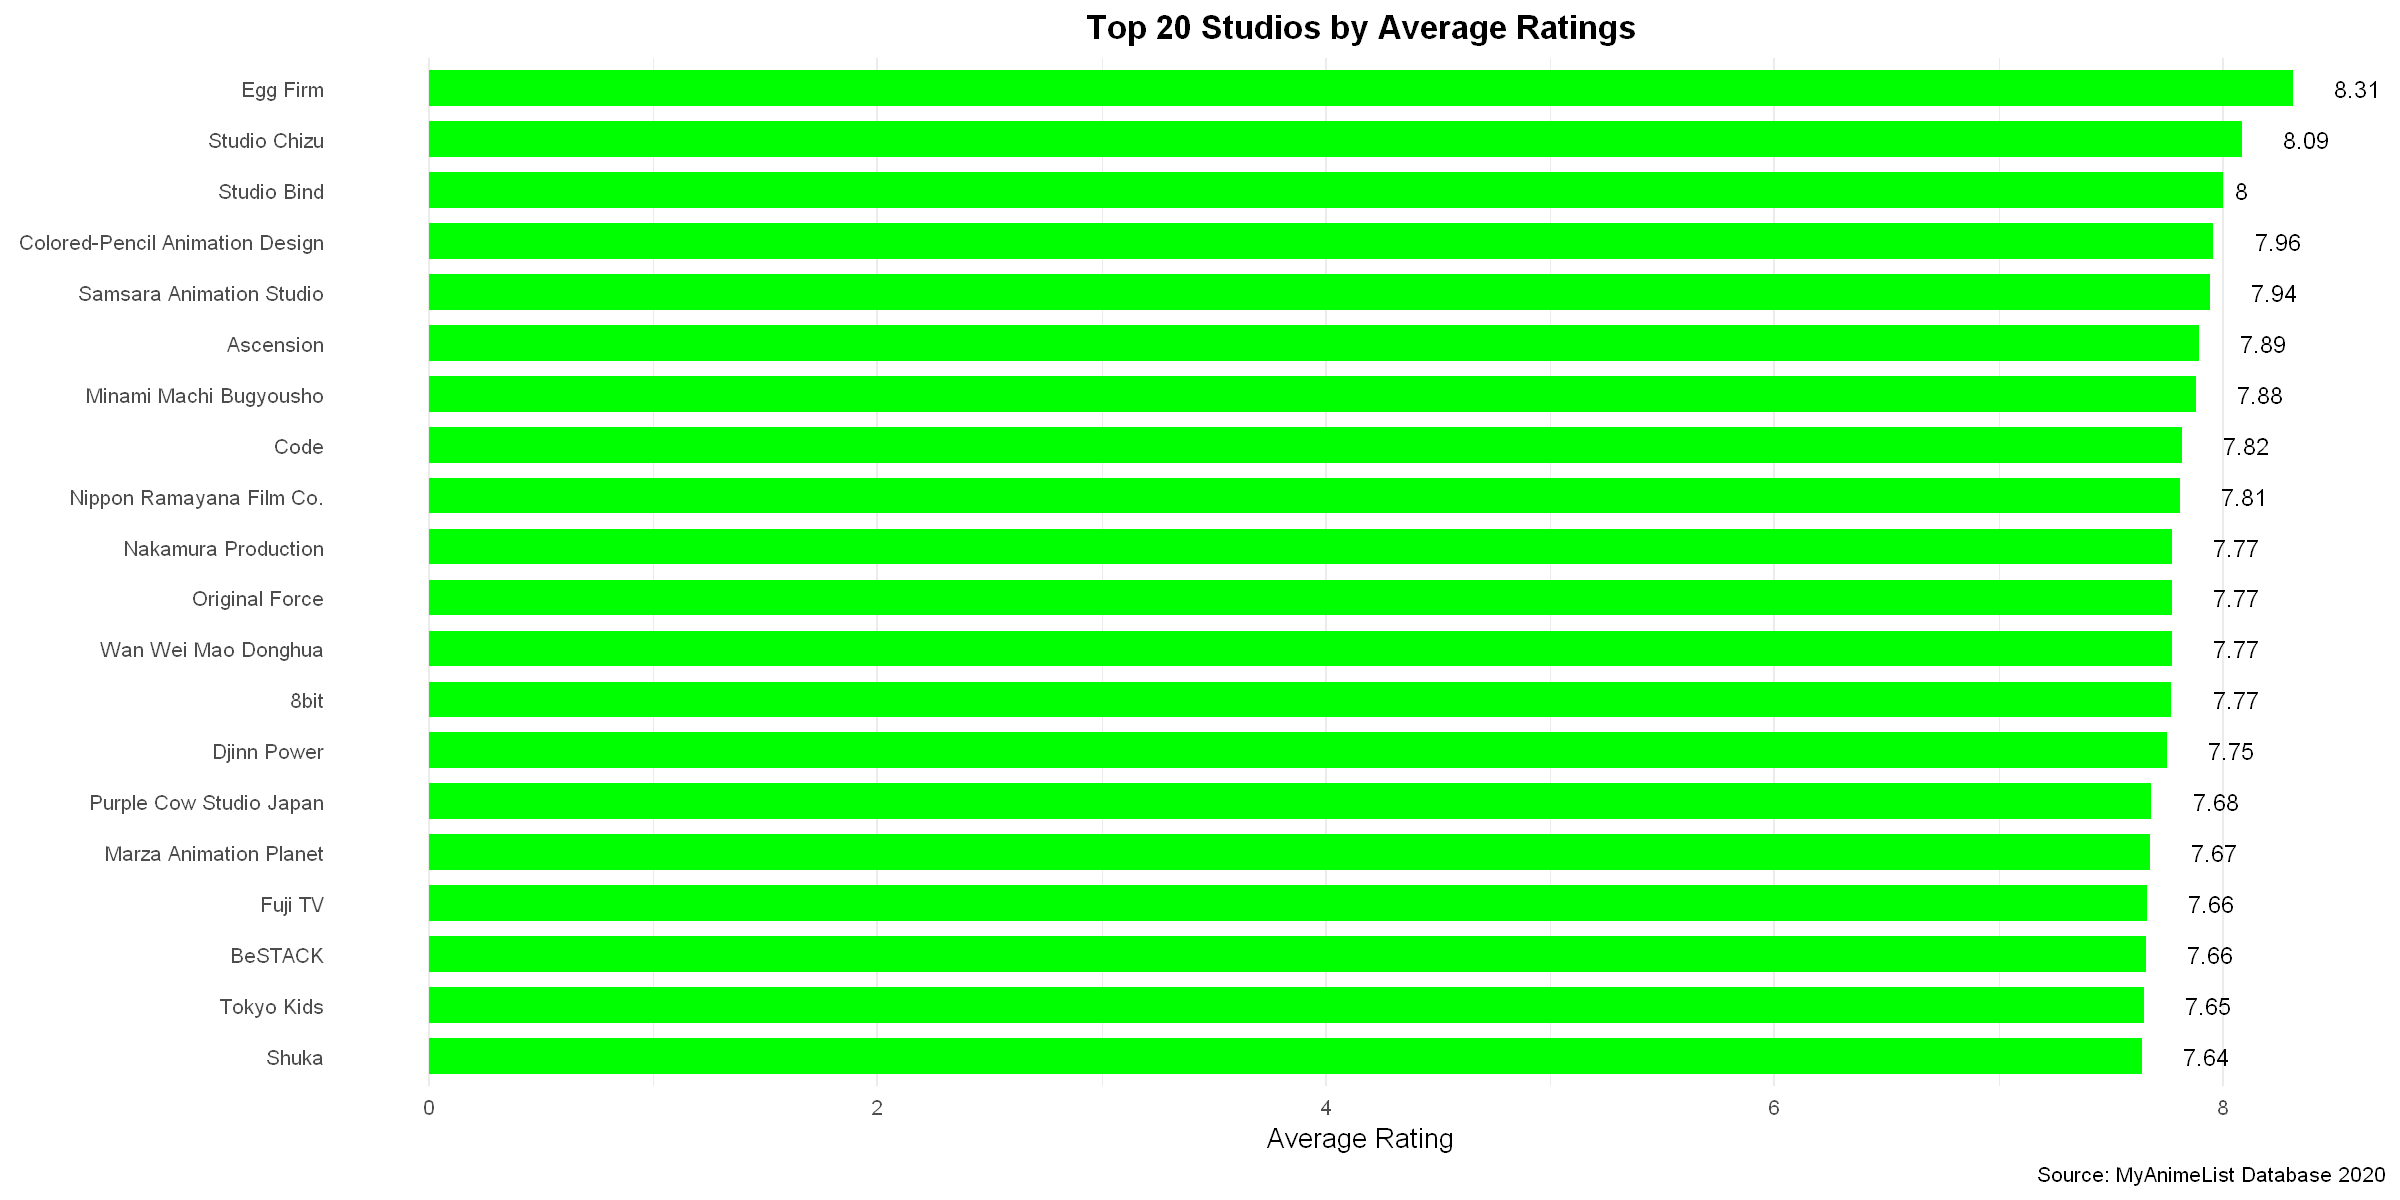

In [29]:
# Visualize the data
ggplot(data = studio_avg_ratings[1:20,], aes(x = reorder(Studios, studio_avg_rating), y = studio_avg_rating)) +
  geom_bar(stat = "identity", fill = "green", width = 0.7) + 
  coord_flip() +
  labs(
    title = "Top 20 Studios by Average Ratings",
    x = "Studio",
    y = "Average Rating",
    caption = "Source: MyAnimeList Database 2020"
  ) +
  theme_minimal(base_size = 16) + 
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20), 
    axis.title.y = element_blank(), 
    panel.grid.major.y = element_blank(),
    panel.grid.minor.y = element_blank()
  ) +
  geom_text(aes(label = round(studio_avg_rating, 2)), hjust = -0.9, size = 5, color = "black") # Label for ratings

# Q2: How Do Duration and Popularity Intersect in Anime Ratings?

- What is the duration distribution of the top-rated animes?- 
What are the top 20 rated animes, and how long are they?

In [5]:
# Load necessary libraries
library(tidyverse)
library(ggplot2)

# Read in the datasets
anime_data <- read.csv("anime.csv", stringsAsFactors = FALSE)
rating_data <- read.csv("rating_complete.csv", stringsAsFactors = FALSE)

In [6]:
# Cleaning the anime data for duration
anime_clean <- anime_data %>%
  select(MAL_ID, Name, Genres, Duration) %>%
  separate_rows(Genres, sep = ",") %>%
  mutate(
    # Convert hours and minutes to total minutes
    Duration = case_when(
      str_detect(Duration, "hr") ~ as.numeric(str_extract(Duration, "\\d+(?= hr)")) * 60 +
                                    as.numeric(ifelse(is.na(str_extract(Duration, "\\d+(?= min)")), 0, str_extract(Duration, "\\d+(?= min)"))),
      TRUE ~ as.numeric(str_extract(Duration, "\\d+"))
    )
  ) %>%
  filter(!is.na(Duration))  # Excluding rows with NA in Duration

In [7]:
# Aggregate the average rating for each anime in the rating_complete dataset
average_ratings <- rating_data %>%
  group_by(anime_id) %>%
  summarise(avg_rating = mean(rating, na.rm = TRUE))

In [8]:
# Merge the cleaned anime data with average ratings
combined_data <- anime_clean %>%
  left_join(average_ratings, by = c("MAL_ID" = "anime_id")) 

## Analysis: Duration Distribution of Top-Rated Animes

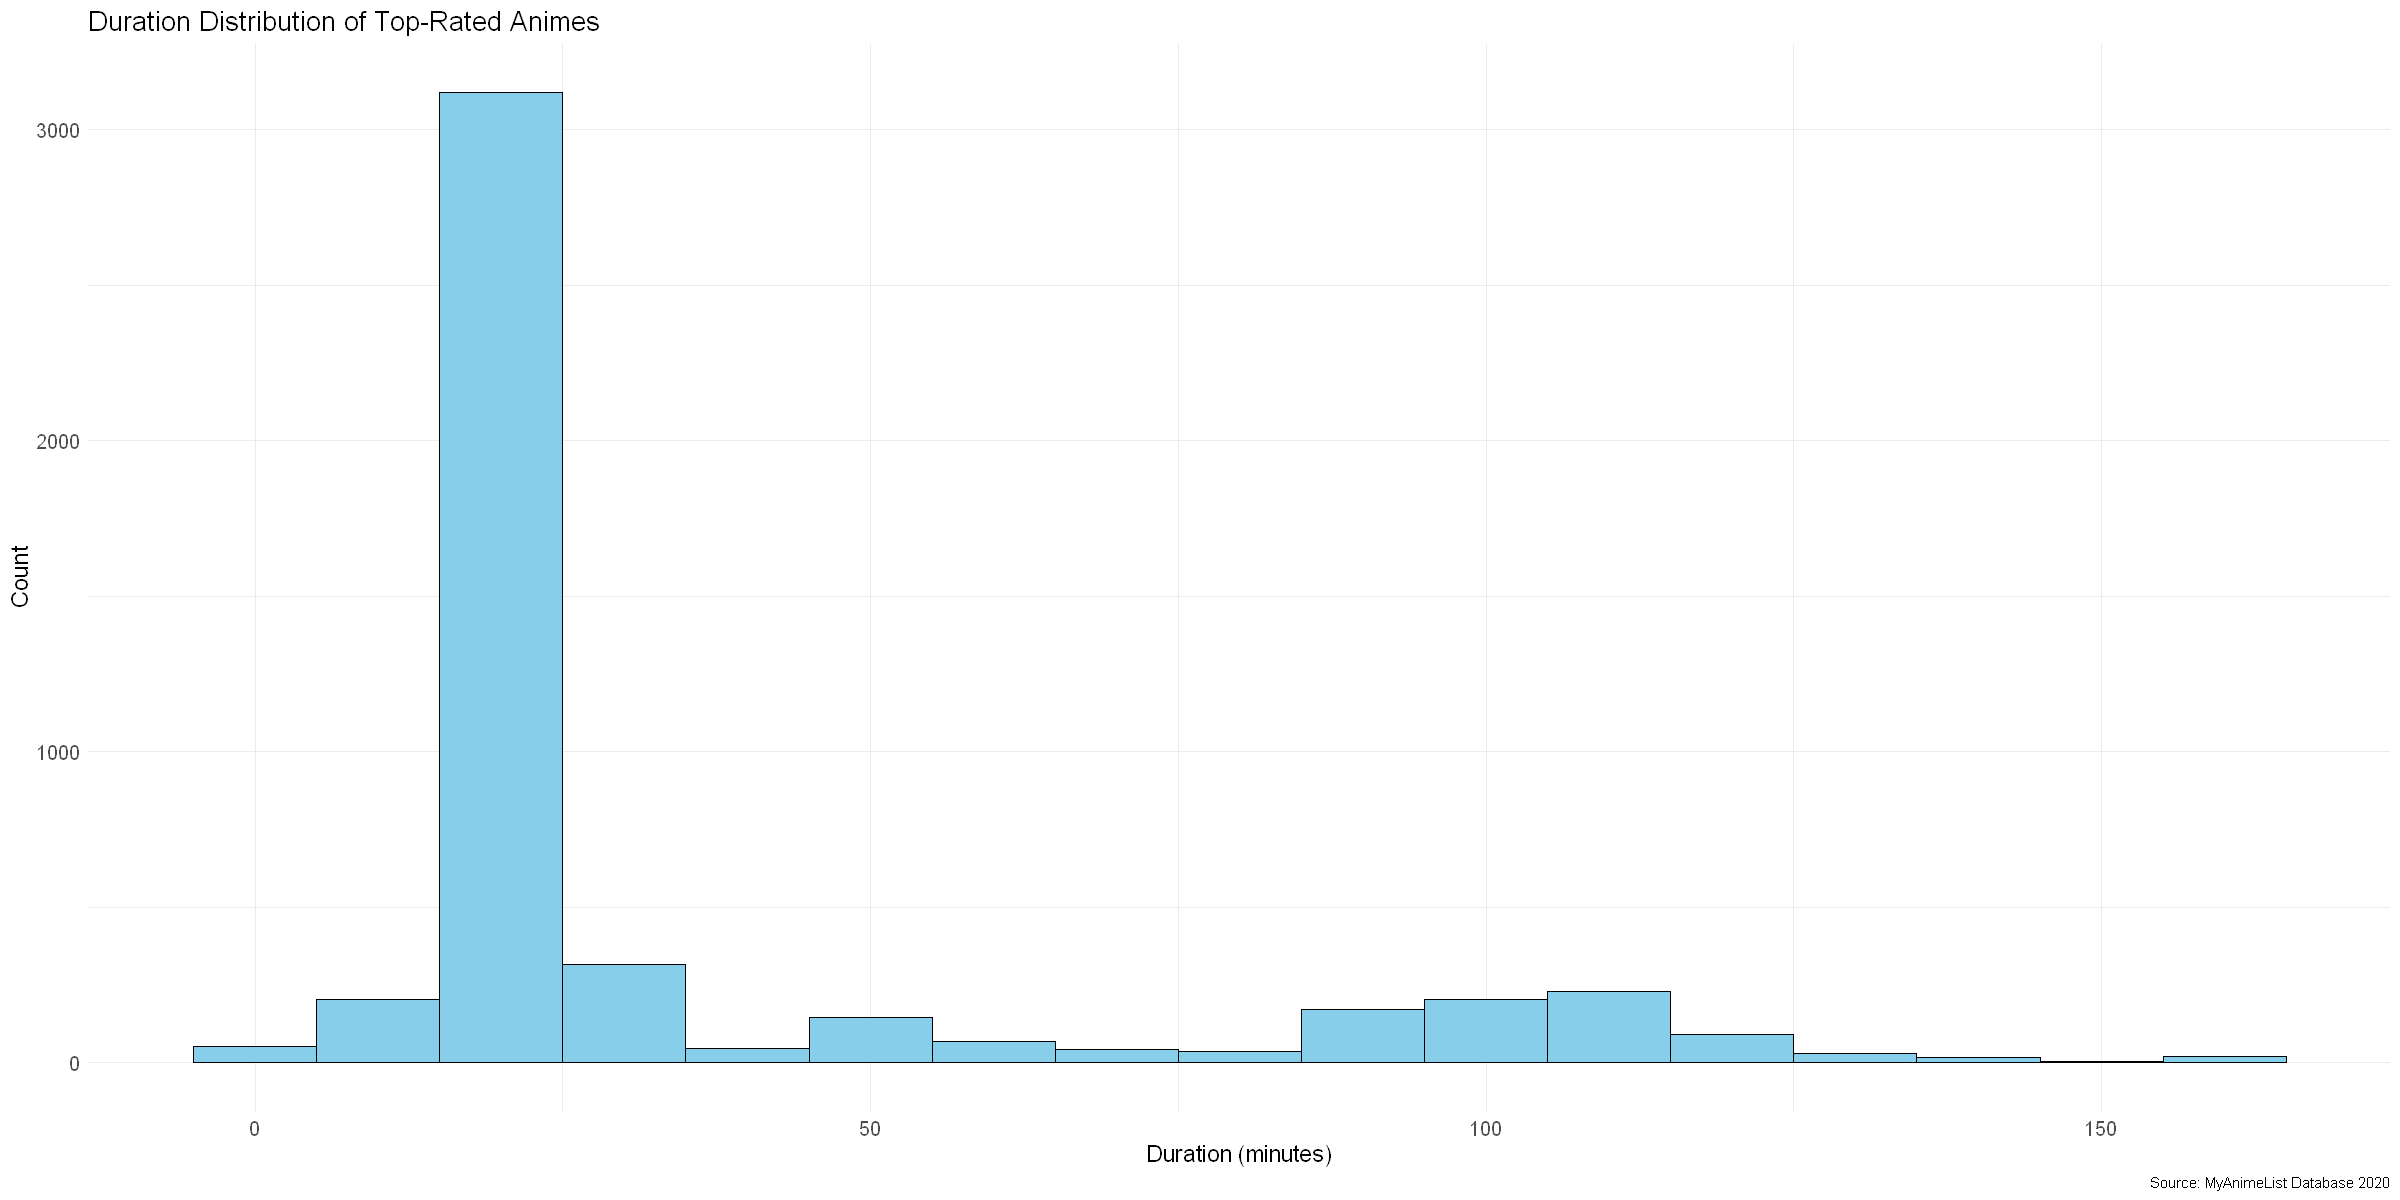

In [37]:
# What is the duration distribution of the top-rated animes? Are top-rated anime series more inclined towards a specific duration range? 
top_rated_animes <- combined_data %>%
  filter(avg_rating >= quantile(combined_data$avg_rating, 0.9, na.rm = TRUE))

ggplot(top_rated_animes, aes(x = Duration)) + 
  geom_histogram(binwidth = 10, fill = "skyblue", color = "black") +
  labs(title = "Duration Distribution of Top-Rated Animes",
       x = "Duration (minutes)",
       y = "Count",
       caption = "Source: MyAnimeList Database 2020") +
  theme_minimal() +
  theme(
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    plot.title = element_text(size = 16)
  )


## Deep Dive: Top 20 Rated Animes and Their Duration

In [33]:
# Calculate the average rating for each anime and filter out animes with 100,000 or fewer ratings
average_ratings <- rating_data %>%
  group_by(anime_id) %>%
  summarise(avg_rating = mean(rating, na.rm = TRUE), num_votes = n()) %>%
  filter(num_votes > 100000)

# Merge the average ratings with the anime data
anime_with_avg_rating <- anime_clean %>%
  left_join(average_ratings, by = c("MAL_ID" = "anime_id"))

# Aggregate ratings and duration at the Name level and filter out top 20 rated animes by rating
top_anime <- anime_with_avg_rating %>%
  group_by(Name) %>%
  summarise(avg_rating = mean(avg_rating, na.rm = TRUE),
            avg_duration = mean(Duration, na.rm = TRUE)) %>%
  top_n(20, avg_rating) %>%
  ungroup() %>%
  arrange(-avg_rating)  # Order by rating

# Set the size of the output plot
options(repr.plot.width=20, repr.plot.height=10)


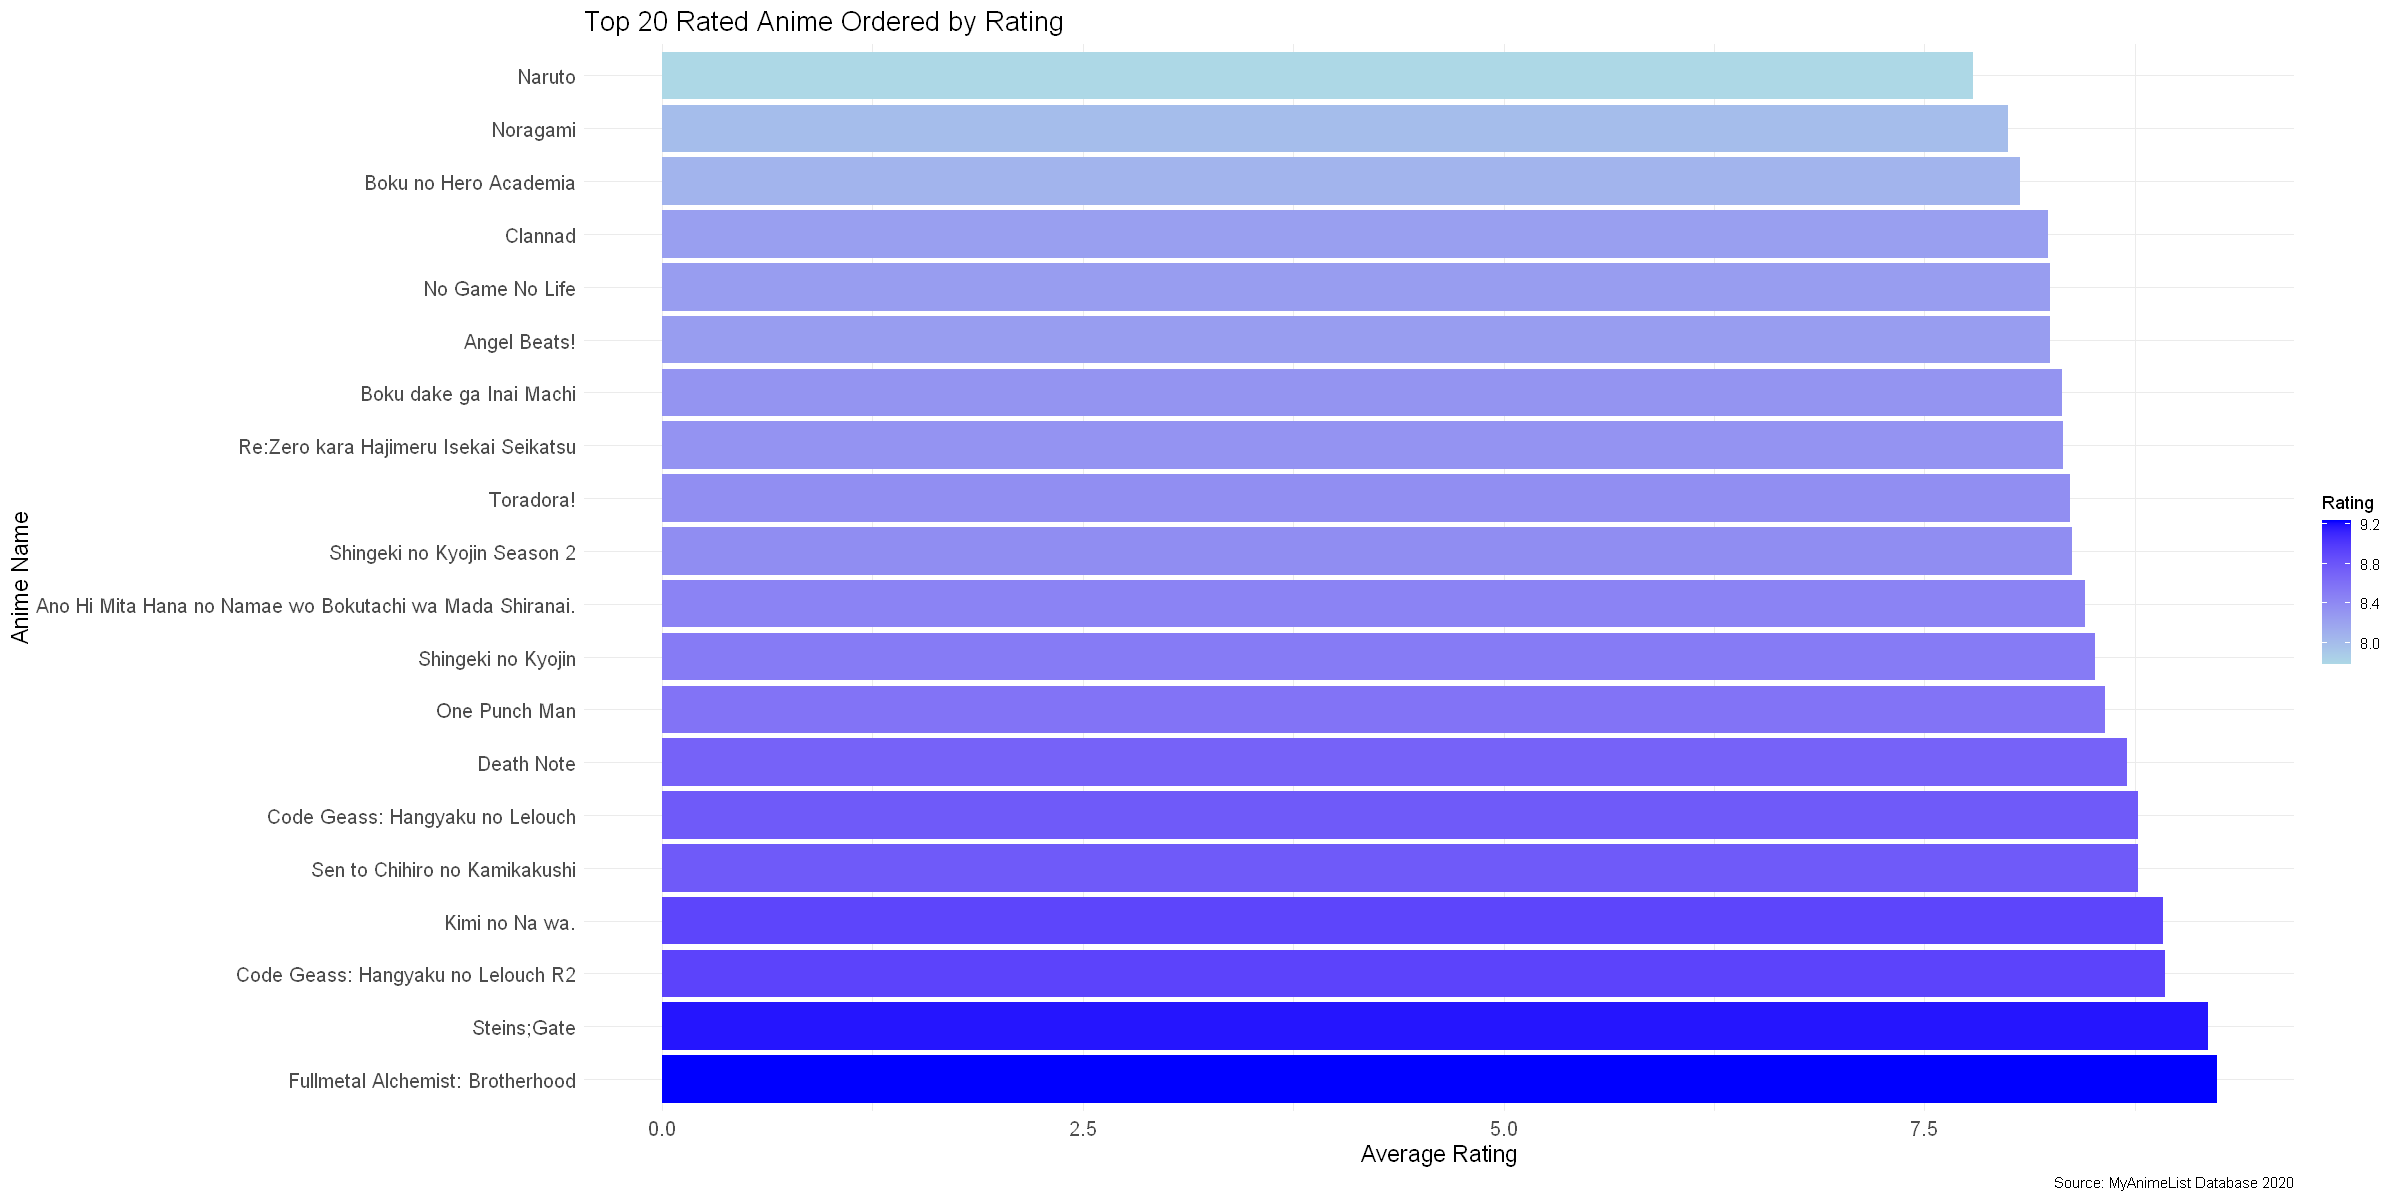

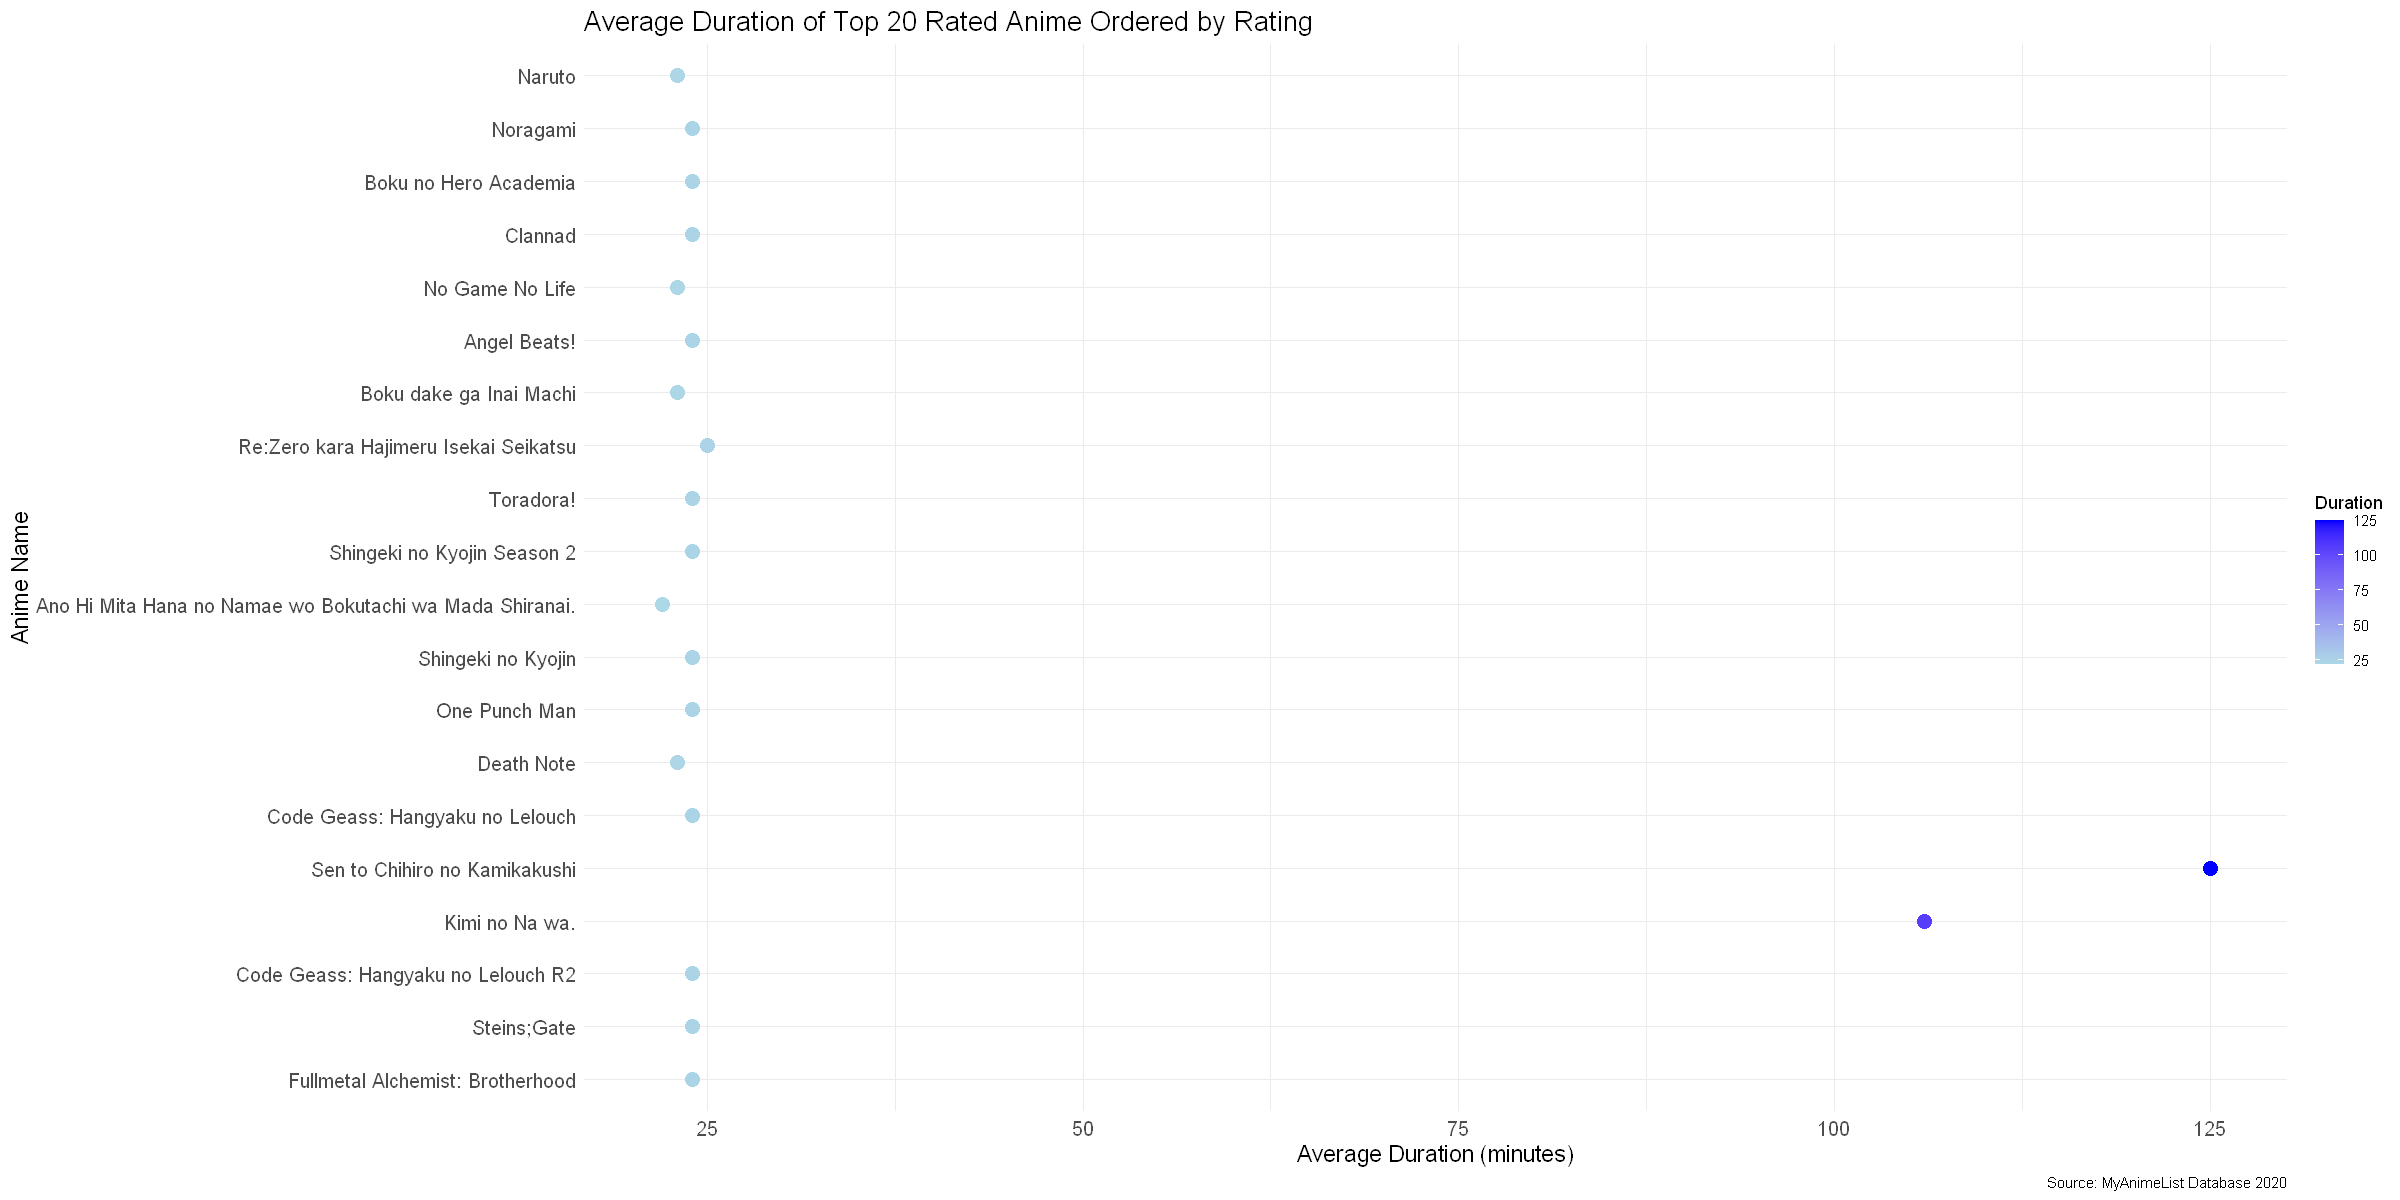

In [38]:
# What are the top 20 rated animes, and how long are they?
# First, a barchart for ratings:

# Plot top 20 rated anime with bars representing their average rating, ordered by rating
ggplot(top_anime, aes(x = reorder(Name, -avg_rating), y = avg_rating, fill = avg_rating)) + 
  geom_bar(stat = "identity") +
  scale_fill_gradient(low = "lightblue", high = "blue", name = "Rating") +
  coord_flip() +
  labs(title = "Top 20 Rated Anime Ordered by Rating",
       x = "Anime Name",
       y = "Average Rating",
       caption = "Source: MyAnimeList Database 2020") +
  theme_minimal() +
  theme(
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    plot.title = element_text(size = 16)
  )


# Then, a dot plot for duration:

ggplot(top_anime, aes(x = reorder(Name, -avg_rating), y = avg_duration)) + 
  geom_point(aes(color = avg_duration), size = 4) +
  scale_color_gradient(low = "lightblue", high = "blue", name = "Duration") +
  coord_flip() +
  labs(title = "Average Duration of Top 20 Rated Anime Ordered by Rating",
       x = "Anime Name",
       y = "Average Duration (minutes)",
       caption = "Source: MyAnimeList Database 2020") +
  theme_minimal() +
  theme(
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    plot.title = element_text(size = 16)
  )

